In [1]:
import findspark
findspark.init()
import pandas as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession

In [2]:
sc = SparkContext()
spark = SparkSession.builder.appName("Python Spark DataFrames basic example").config("spark.some.config.option", "some-value").getOrCreate()

In [3]:
spark

In [4]:
df = pd.read_csv(r'E:\cms-downloader\cms_downloads\Spring 2023\Big Data and NoSQL\week 2023-5-11\BD S23 A2\music_streaming.csv')
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [5]:
# get some basic info about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15517 entries, 0 to 15516
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         15517 non-null  object 
 1   Track Name          15517 non-null  object 
 2   Popularity          15123 non-null  float64
 3   danceability        15517 non-null  float64
 4   energy              15517 non-null  float64
 5   key                 13774 non-null  float64
 6   loudness            15517 non-null  float64
 7   mode                15517 non-null  int64  
 8   speechiness         15517 non-null  float64
 9   acousticness        15517 non-null  float64
 10  instrumentalness    11930 non-null  float64
 11  liveness            15517 non-null  float64
 12  valence             15517 non-null  float64
 13  tempo               15517 non-null  float64
 14  duration_in min/ms  15517 non-null  float64
 15  time_signature      15517 non-null  int64  
 16  Genr

Cleaning the data
1. remove duplicated tracks
2. check missing Values and handling them
3. remove outliers
4. Transformation

1. remove duplicates

In [6]:
# 1. remove duplicates (Artist Name + Track Name)
df = df.drop_duplicates(subset=['Track Name'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13021 entries, 0 to 15515
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         13021 non-null  object 
 1   Track Name          13021 non-null  object 
 2   Popularity          12688 non-null  float64
 3   danceability        13021 non-null  float64
 4   energy              13021 non-null  float64
 5   key                 11555 non-null  float64
 6   loudness            13021 non-null  float64
 7   mode                13021 non-null  int64  
 8   speechiness         13021 non-null  float64
 9   acousticness        13021 non-null  float64
 10  instrumentalness    9938 non-null   float64
 11  liveness            13021 non-null  float64
 12  valence             13021 non-null  float64
 13  tempo               13021 non-null  float64
 14  duration_in min/ms  13021 non-null  float64
 15  time_signature      13021 non-null  int64  
 16  Genr

Decreased the rows from 15517 rows to 13881 rows

2. Handle missing values

In [7]:
# 2. missing values in each column
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1466
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3083
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Genre                    0
dtype: int64

drop rows where Popularity is missing as there are 352 only missing

In [8]:
df = df.dropna(subset=['Popularity'])
df['Popularity'].isnull().sum()

0

drop key column as it is not needed in our analysis

In [9]:

df = df.drop(columns=['key'])
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


For each artist name, impute the missing values with the mean of the instrumentalness of this artist's other songs

In [10]:
df['instrumentalness'] = df.groupby('Artist Name')['instrumentalness'].transform(lambda x: x.fillna(x.mean()))
df['instrumentalness'].isnull().sum()

1810

but some artists don't have other songs that have instrumentalness then impute them from the mean of the column instrumentalness

In [11]:
# impute instrumentalness with the mean of the instrumentalness of all songs
df['instrumentalness'] = df['instrumentalness'].fillna(df['instrumentalness'].mean())
df['instrumentalness'].isnull().sum()

0

3. Remove Outliers

<AxesSubplot: xlabel='loudness'>

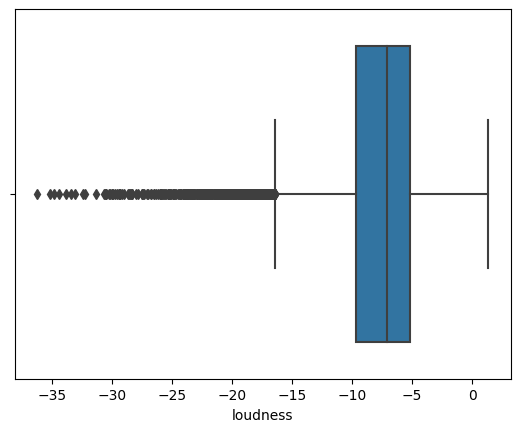

In [12]:
# plot the boxplot of loudness
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['loudness'])

remove outliers of loudness by using IQR

<AxesSubplot: xlabel='loudness'>

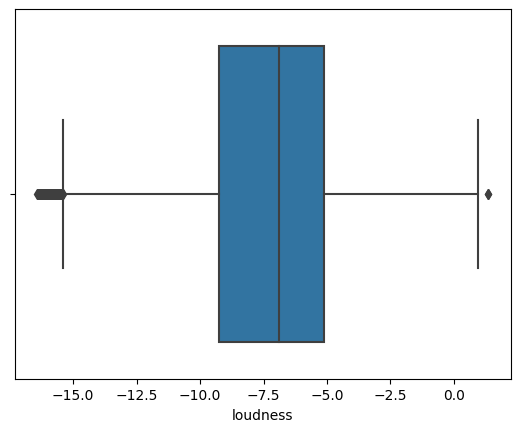

In [13]:
Q1 = df['loudness'].quantile(0.25)
Q3 = df['loudness'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['loudness'] < (Q1 - 1.5 * IQR)) |(df['loudness'] > (Q3 + 1.5 * IQR)))]
sns.boxplot(x=df['loudness'])


4. Transform duration to minutes only

duration_in min/ms some of the rows are in minutes and some are milliseconds, change all to minutes

<AxesSubplot: >

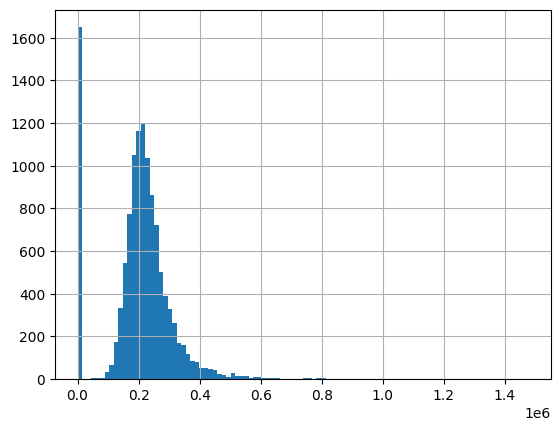

In [14]:
# plot histogram of (duration_in min/ms)
df['duration_in min/ms'].hist(bins=100)


In [15]:
df[df['duration_in min/ms'] < 1000]['duration_in min/ms'].sort_values(ascending=False)

13613    29.886000
1108     29.450000
13007    23.291550
10473    16.743783
1613     12.563333
           ...    
10716     1.027483
11302     0.979333
8830      0.969150
1360      0.533917
4184      0.501650
Name: duration_in min/ms, Length: 1650, dtype: float64

In [16]:
# maximum song length in minutes is 29.8 
# `duration_in min/ms` > 1000 then divide the value by 60000 to convert it to minutes
# we are sure that the all the values > 29.8 are in milliseconds

df['duration_in min/ms'] = df['duration_in min/ms'].apply(lambda x: x/60000 if x > 1000 else x)

In [17]:
sdf = spark.createDataFrame(df) 
sdf.printSchema()

root
 |-- Artist Name: string (nullable = true)
 |-- Track Name: string (nullable = true)
 |-- Popularity: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: long (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- duration_in min/ms: double (nullable = true)
 |-- time_signature: long (nullable = true)
 |-- Genre: long (nullable = true)



B. remove rows where duration_in min/ms is > 5 minutes spark sql

In [19]:

sdf.createOrReplaceTempView("music_streaming")
sdf = spark.sql("SELECT * FROM music_streaming WHERE `duration_in min/ms` > 5")
sdf.show()

+--------------------+--------------------+----------+------------+------+--------+----+-----------+------------+--------------------+--------+-------+-------+------------------+--------------+-----+
|         Artist Name|          Track Name|Popularity|danceability|energy|loudness|mode|speechiness|acousticness|    instrumentalness|liveness|valence|  tempo|duration_in min/ms|time_signature|Genre|
+--------------------+--------------------+----------+------------+------+--------+----+-----------+------------+--------------------+--------+-------+-------+------------------+--------------+-----+
|          Bruno Mars|That's What I Lik...|      60.0|       0.854| 0.564|  -4.964|   1|     0.0485|      0.0171| 0.16765870289458315|  0.0849|  0.899|134.071|          234596.0|             4|    5|
|              Boston|        Hitch a Ride|      54.0|       0.382| 0.814|   -7.23|   1|     0.0406|      0.0011|             0.00401|   0.101|  0.569|116.454|          251733.0|             4|   10|


C. Display songs where Artist Name is J. Cole or Novo Amor or Anson Seabra.

In [20]:
spark.sql("SELECT * FROM music_streaming WHERE `Artist Name` IN ('J. Cole', 'Novo Amor', 'Anson Seabra')").show()


+------------+--------------------+----------+------------+------+--------+----+-----------+------------+-------------------+--------+-------+-------+------------------+--------------+-----+
| Artist Name|          Track Name|Popularity|danceability|energy|loudness|mode|speechiness|acousticness|   instrumentalness|liveness|valence|  tempo|duration_in min/ms|time_signature|Genre|
+------------+--------------------+----------+------------+------+--------+----+-----------+------------+-------------------+--------+-------+-------+------------------+--------------+-----+
|     J. Cole|p u n c h i n ‚Äò...|      81.0|       0.769|  0.74|  -6.579|   0|      0.378|       0.197|0.16765870289458315|   0.171|  0.692| 94.104|          112579.0|             4|    5|
|     J. Cole|p r i d e . i s ....|      85.0|       0.861| 0.656|  -7.867|   0|      0.425|       0.104|0.16765870289458315|  0.0986|  0.331| 88.967|          218210.0|             4|    5|
|     J. Cole|   i n t e r l u d e|      81.0

D. How many songs are included in every category?

In [21]:
spark.sql("SELECT Genre, COUNT(*) AS count FROM music_streaming GROUP BY Genre").show()

+-----+-----+
|Genre|count|
+-----+-----+
|    0|  444|
|    7|  140|
|    6| 1647|
|    9| 1471|
|    5| 1086|
|    1|  772|
|   10| 3410|
|    3|  340|
|    8| 1474|
|    2| 1006|
|    4|  327|
+-----+-----+



E. Which artists dominated the charts?

In [22]:
# count the number of songs for each artist
spark.sql("SELECT `Artist Name`, COUNT(*) AS count FROM music_streaming GROUP BY `Artist Name`").sort('count', ascending=False).show()

+--------------------+-----+
|         Artist Name|count|
+--------------------+-----+
|     Backstreet Boys|   62|
|      Britney Spears|   40|
|  The Rolling Stones|   28|
|                  U2|   26|
|           Metallica|   24|
|     Lata Mangeshkar|   23|
|            Westlife|   23|
|       Mohammed Rafi|   21|
|       Kishore Kumar|   18|
|             Nirvana|   18|
|               AC/DC|   18|
|        Led Zeppelin|   17|
|       Fleetwood Mac|   17|
|           Pearl Jam|   17|
|      The Black Keys|   16|
|            Coldplay|   15|
|Red Hot Chili Pep...|   15|
|              Mukesh|   15|
|               Queen|   14|
|     Imagine Dragons|   13|
+--------------------+-----+
only showing top 20 rows



In [23]:
# Mean of the popularity for each artist, tells us how the songs of each artist are popular
spark.sql("SELECT `Artist Name`, AVG(Popularity) AS mean_popularity FROM music_streaming GROUP BY `Artist Name`").sort('mean_popularity', ascending=False).show()

+--------------------+-----------------+
|         Artist Name|  mean_popularity|
+--------------------+-----------------+
|            Måneskin|            100.0|
|The Kid LAROI, Ju...|             97.0|
|Justin Bieber, Da...|             95.0|
|     Los Legendarios|             95.0|
|          Nio Garcia|             93.0|
|          Tion Wayne|             90.0|
|        Bella Poarch|             90.0|
|             Cardi B|             90.0|
|    Dua Lipa, DaBaby|             90.0|
|          The Weeknd|            89.25|
|  Majestic, Boney M.|             89.0|
|Galantis, David G...|             89.0|
|                 SZA|             89.0|
|        Nathan Evans|             89.0|
|     ATB, Topic, A7S|             88.0|
|    Trinidad Cardona|             88.0|
|  Travis Scott, HVME|             88.0|
|          Surf Curse|             88.0|
|            Doja Cat|87.33333333333333|
|            Ofenbach|             87.0|
+--------------------+-----------------+
only showing top

F. What songs would be considered for the “Billboard Top 10 Songs of the Year”?
(mention their artists as well)

In [24]:
# Top 10 songs based on popularity
spark.sql("SELECT `Track Name`, `Artist Name`, Popularity FROM music_streaming ORDER BY Popularity DESC LIMIT 10").show()



+--------------------+--------------------+----------+
|          Track Name|         Artist Name|Popularity|
+--------------------+--------------------+----------+
|             Beggin'|            Måneskin|     100.0|
|            good 4 u|      Olivia Rodrigo|      99.0|
|Kiss Me More (fea...|            Doja Cat|      98.0|
|STAY (with Justin...|The Kid LAROI, Ju...|      97.0|
| Permission to Dance|                 BTS|      95.0|
|Peaches (feat. Da...|Justin Bieber, Da...|      95.0|
|                Fiel|     Los Legendarios|      95.0|
|             deja vu|      Olivia Rodrigo|      95.0|
|          Todo De Ti|      Rauw Alejandro|      95.0|
|             traitor|      Olivia Rodrigo|      94.0|
+--------------------+--------------------+----------+



G. Recommend at least 5 songs that can be played at a party

In [25]:
# songs with high danceability: Describes how suitable a track is for dancing 
# high tempo: is the speed or pace of a given piece
# high loudness
# high valence: Tracks with high valence sound more positive 
spark.sql("SELECT `Track Name`, `Artist Name`, danceability, tempo, loudness, valence FROM music_streaming ORDER BY danceability DESC, tempo DESC, loudness DESC, valence DESC LIMIT 5").show()

+--------------------+---------------+------------+-------+--------+-------+
|          Track Name|    Artist Name|danceability|  tempo|loudness|valence|
+--------------------+---------------+------------+-------+--------+-------+
|      Gucci Umbrella|Whookilledkenny|       0.989|120.004|   -7.02|  0.604|
|Divine Gosa - Swi...|      Radioclit|       0.982|131.023|  -4.956|  0.866|
|           kawamurra|        sunflwr|        0.98|126.004|  -9.665|  0.285|
|  Dancing in My Room|       347aidan|       0.979|119.971| -11.056|   0.74|
|    OG Bobby Johnson|           QUE.|       0.974| 110.97|  -3.879|  0.513|
+--------------------+---------------+------------+-------+--------+-------+

